In [97]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:


import pandas as pd
import numpy as np
df = pd.read_csv('weather1.csv',index_col='obstime',parse_dates=True)
df = df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (4898, 5)


,tempr,ap,ws,wd,rh
obstime,,,,,
2015-11-01 00:00:00,-12.52,973.92,29.30,86.38,43.13
2015-11-01 01:00:00,-11.88,973.54,26.00,87.63,44.22
2015-11-01 02:00:00,-10.60,973.14,24.80,86.27,43.35
2015-11-01 03:00:00,-9.46,972.51,23.96,87.77,43.95
2015-11-01 04:00:00,-7.80,971.80,20.90,72.77,44.03


<Axes: xlabel='obstime'>

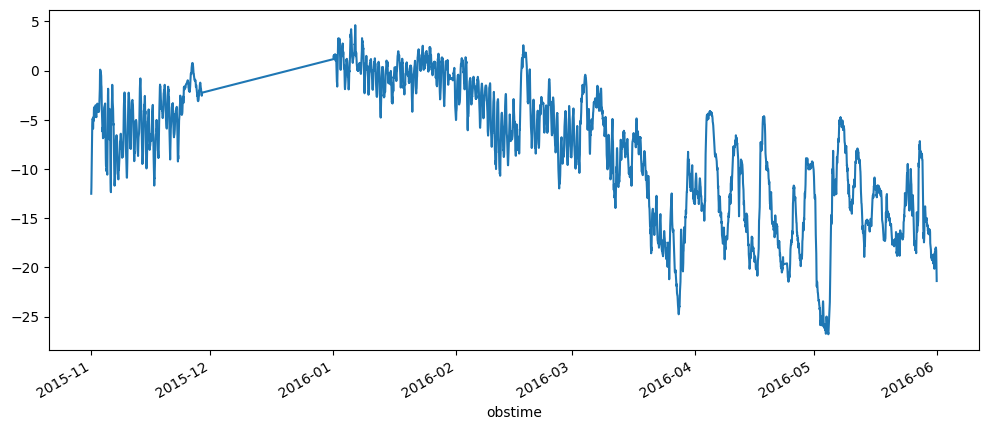

In [99]:
df['tempr'].plot(figsize=(12,5))

Now we will check for stationarity. Conditions for stationarity are:
1. Means and Variance should be constant
2. Timeseries should not have any repeating pattern or trends

We now gonna use 'Augmented Dickey-Fuller' test used for checking the stationarity of a time series.

P-value = Probablity value 
if p>0.5 : dataset not stationary
if p<0.5 :  dataset is stationary

If a time series does not exhibit autocorrelation (i.e., the values are independent of each other over time), simpler models like moving averages or basic statistical methods might be sufficient for analysis and forecasting.

In [100]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['tempr'] , autolag='AIC')
print("1. ADF :" , dftest[0])   # A more negative value generally indicates stronger evidence against the null hypothesis, suggesting that the data is stationary.
print("2. P-Value:" , dftest[1])
print("3. Num of Lags :" , dftest[2]) # 32 lags in a time series model  it means the model is using the past 32 values of the time series to predict or explain the present value.
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :" , dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ":", val)

1. ADF : -3.1530044744195496
2. P-Value: 0.022871278507630665
3. Num of Lags : 32
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4865
5. Critical Values :
	 1% : -3.4316948620176393
	 5% : -2.862134279956787
	 10% : -2.5670863365651626


Figure Out Order For Arima Model(AR , I , MA)

AR=> used past value to make future prediction

I=> used to make dataset stationary

MA =>  uses past error to make future prediction

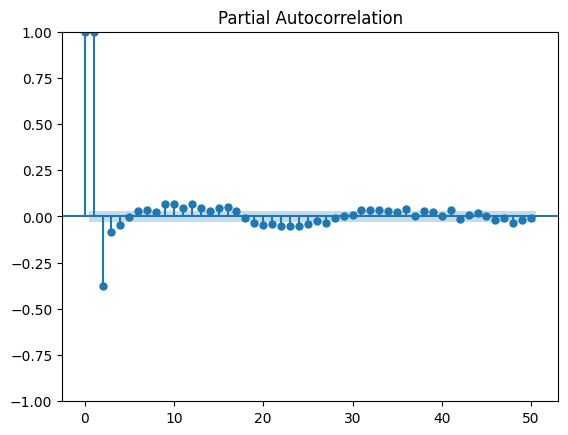

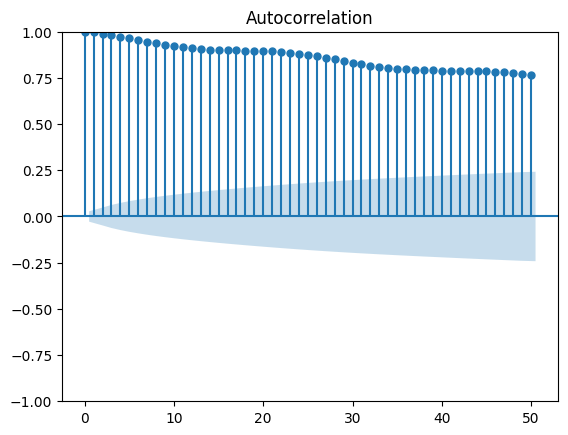

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['tempr'],lags=50)        # we can see lag = 2 because  no of lines that is significantly above blue lines... so tentatively p = 2 in pacf
acf = plot_acf(df['tempr'],lags=50)     # we can see lag = 27 because no of lines that is significantly above blue lines... so tentatively q =27 in acf

# as dataset is stationary so d = 0      hence (p = 2 , d = 0 , q = 27)

In [102]:
from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(4898, 5)
(30, 5) (30, 5)


In [103]:
model = ARIMA(train['tempr'],order=(2 ,0 , 27))
model = model.fit()
model.summary()


c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  tempr   No. Observations:                   30
Model:                ARIMA(2, 0, 27)   Log Likelihood                 -14.465
Date:                Sat, 31 Aug 2024   AIC                             90.931
Time:                        19:36:01   BIC                            134.368
Sample:                             0   HQIC                           104.827
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4572     17.548     -0.425      0.671     -41.851      26.937
ar.L1          1.0658    314.366      0.003      0.997    -615.080     617.211
ar.L2         -0.3429    242.633     -0.001      0.999    -475.894     475.208
ma.L1          0.5354   2.44e+04    2.2e-05      1.000   -4.78e+04    4.78e+04
ma.L2          0.6627   2.74e+04   2.41e-05      1.000   -5.38e+04    5.38e+04
ma.L3          1.0976   1.28e+04   8.57e-05      1.000   -2.51e+04    2.51e+04
ma.L4          1.2877   3.49e+04   3.69e-05      1.000   -6.85e+04    6.85e+04
ma.L5          0.5895   2.49e+04   2.37e-05      1.000   -4.88e+04    4.88e+04
ma.L6          0.6866   8.47e+04   8.11e-06      1.000   -1.66e+05    1.66e+05
ma.L7          0.8044   1.89e+04   4.26e-05      1.000   -3.71e+04    3.71e+04
ma.L8          0.8046   1.05e+05   7.69e-06      1.000   -2.05e+05    2.05e+05
ma.L9          0.7821   7.15e+04   1.09e-05      1.000    -1.4e+05     1.4e+05
ma.L10         0.7463   1.07e+05   6.97e-06      1.000    -2.1e+05     2.1e+05
ma.L11         1.0196   7.72e+04   1.32e-05      1.000   -1.51e+05    1.51e+05
ma.L12         0.8091   7.55e+04   1.07e-05      1.000   -1.48e+05    1.48e+05
ma.L13         0.9936   4.84e+04   2.05e-05      1.000   -9.49e+04    9.49e+04
ma.L14         1.3602   5.63e+04   2.41e-05      1.000    -1.1e+05     1.1e+05
ma.L15         0.7138      4e+04   1.78e-05      1.000   -7.84e+04    7.84e+04
ma.L16         0.5660   5.64e+04      1e-05      1.000   -1.11e+05    1.11e+05
ma.L17         1.0253   7918.674      0.000      1.000   -1.55e+04    1.55e+04
ma.L18         0.8902   7509.241      0.000      1.000   -1.47e+04    1.47e+04
ma.L19         0.4475   1.33e+04   3.38e-05      1.000    -2.6e+04     2.6e+04
ma.L20         0.6802   2.49e+04   2.74e-05      1.000   -4.87e+04    4.87e+04
ma.L21         1.1593   2.77e+04   4.18e-05      1.000   -5.44e+04    5.44e+04
ma.L22         0.9584   8712.008      0.000      1.000   -1.71e+04    1.71e+04
ma.L23         1.0141   1.36e+04   7.48e-05      1.000   -2.66e+04    2.66e+04
ma.L24         0.6865    1.7e+04   4.03e-05      1.000   -3.34e+04    3.34e+04
ma.L25         0.8664   1.65e+04   5.24e-05      1.000   -3.24e+04    3.24e+04
ma.L26         0.2964   1.12e+04   2.66e-05      1.000   -2.19e+04    2.19e+04
ma.L27         0.3837   2954.535      0.000      1.000   -5790.399    5791.166
sigma2         0.0583    456.624      0.000      1.000    -894.908     895.024
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.55   Prob(JB):                         0.26
Heteroskedasticity (H):               0.14   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [104]:
df.__len__

<bound method DataFrame.__len__ of                      tempr      ap     ws     wd     rh
obstime                                                
2015-11-01 00:00:00 -12.52  973.92  29.30  86.38  43.13
2015-11-01 01:00:00 -11.88  973.54  26.00  87.63  44.22
2015-11-01 02:00:00 -10.60  973.14  24.80  86.27  43.35
2015-11-01 03:00:00  -9.46  972.51  23.96  87.77  43.95
2015-11-01 04:00:00  -7.80  971.80  20.90  72.77  44.03
...                    ...     ...    ...    ...    ...
2016-05-31 19:00:00 -18.09  971.88   6.58  41.80  76.26
2016-05-31 20:00:00 -18.32  972.59   6.57  39.93  76.25
2016-05-31 21:00:00 -19.51  973.39  10.53  44.23  74.99
2016-05-31 22:00:00 -20.86  974.42  11.72  40.68  73.48
2016-05-31 23:00:00 -21.39  975.28   9.96  30.62  72.26

[4898 rows x 5 columns]>

Make Predictions on Test Set

In [105]:
from statsmodels.tsa.arima.model import ARIMA

# Set start and end for prediction range
start = len(train)
end = len(train) + len(test) - 1

# Fit the ARIMA model on the testing data
# Assuming 'tempr' is the column of interest in the train DataFrame
model = ARIMA(test['tempr'], order=(2, 0, 27))  # Define the model with the correct order
fitted_model = model.fit()  # Fit the model to the testing data

# Make predictions using the fitted model
pred = fitted_model.predict(start=start, end=end, typ='levels')
print(pred)



c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to est

2016-06-01 00:00:00   -21.266614
2016-06-01 01:00:00   -20.486727
2016-06-01 02:00:00   -19.824357
2016-06-01 03:00:00   -19.527603
2016-06-01 04:00:00   -19.208263
2016-06-01 05:00:00   -18.898948
2016-06-01 06:00:00   -18.170711
2016-06-01 07:00:00   -17.324321
2016-06-01 08:00:00   -17.058462
2016-06-01 09:00:00   -17.052806
2016-06-01 10:00:00   -17.784823
2016-06-01 11:00:00   -18.420453
2016-06-01 12:00:00   -19.140364
2016-06-01 13:00:00   -19.601919
2016-06-01 14:00:00   -19.847973
2016-06-01 15:00:00   -19.791612
2016-06-01 16:00:00   -19.627857
2016-06-01 17:00:00   -19.492141
2016-06-01 18:00:00   -19.615841
2016-06-01 19:00:00   -19.516031
2016-06-01 20:00:00   -19.209625
2016-06-01 21:00:00   -18.857989
2016-06-01 22:00:00   -18.555273
2016-06-01 23:00:00   -18.631041
2016-06-02 00:00:00   -18.783095
2016-06-02 01:00:00   -18.957920
2016-06-02 02:00:00   -19.001640
2016-06-02 03:00:00   -19.022443
2016-06-02 04:00:00   -19.006148
2016-06-02 05:00:00   -19.005049
Freq: H, N

c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2016-06-01 00:00:00   -21.266614
2016-06-01 01:00:00   -20.486727
2016-06-01 02:00:00   -19.824357
2016-06-01 03:00:00   -19.527603
2016-06-01 04:00:00   -19.208263
2016-06-01 05:00:00   -18.898948
2016-06-01 06:00:00   -18.170711
2016-06-01 07:00:00   -17.324321
2016-06-01 08:00:00   -17.058462
2016-06-01 09:00:00   -17.052806
2016-06-01 10:00:00   -17.784823
2016-06-01 11:00:00   -18.420453
2016-06-01 12:00:00   -19.140364
2016-06-01 13:00:00   -19.601919
2016-06-01 14:00:00   -19.847973
2016-06-01 15:00:00   -19.791612
2016-06-01 16:00:00   -19.627857
2016-06-01 17:00:00   -19.492141
2016-06-01 18:00:00   -19.615841
2016-06-01 19:00:00   -19.516031
2016-06-01 20:00:00   -19.209625
2016-06-01 21:00:00   -18.857989
2016-06-01 22:00:00   -18.555273
2016-06-01 23:00:00   -18.631041
2016-06-02 00:00:00   -18.783095
2016-06-02 01:00:00   -18.957920
2016-06-02 02:00:00   -19.001640
2016-06-02 03:00:00   -19.022443
2016-06-02 04:00:00   -19.006148
2016-06-02 05:00:00   -19.005049
Freq: H, N

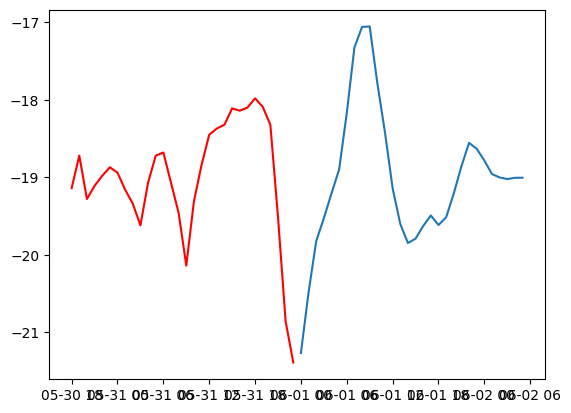

In [106]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test['tempr'],color='red' )
print(pred)

In [107]:
test['tempr'].mean()

-19.003

In [108]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test['tempr'], pred))
print(rmse)

1.192514108074405
